In [1]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

/home/ubuntu/coq-modeling/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
PROJECT_DIR = os.path.join(os.environ["HOME"], "coq-modeling")
os.chdir(PROJECT_DIR)

In [3]:

PATHS = {
    #"No Coq": "premise-eval/prem-select-no-coq",
    #"No Coq CrossEnt": "premise-eval/prem-select-no-coq-crossent",
    #"Select Model Opt": "premise-eval/prem-select",
    # "Rerank Model": "premise-eval/rerank-pos-opt",
    # "Rerank Model Select Opt": "premise-eval/rerank-opt-select",
    "TF IDF": "premise-eval/tfidf",
    "Select": "premise-eval/prem-select",
    "Random": "premise-eval/random",
    # "BM25": "premise-eval/bm25",
    #"Hard Premises": "premise-eval/prem-select-no-coq-crossent-pos",
    #"Lemma Premises": "premise-eval/prem-select-lemma",
}

#ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#ATS = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
#ATS = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
ATS = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]

names: list[str] = []
recalls_list: list[list[float]] = []
for name, path in PATHS.items():
    with open(path, "r") as fin:
        eval_json_data = json.load(fin)
    eval_data = EvalData.from_json(eval_json_data)
    recalls: list[float] = []
    for k in ATS:
        recall_at_k = eval_data.recall_at(k)
        recalls.append(recall_at_k) 
    names.append(name)
    recalls_list.append(recalls)
    

FileNotFoundError: [Errno 2] No such file or directory: 'premise-eval/tfidf'

Text(0.5, 1.0, 'Comparison of Premise Selection Methods')

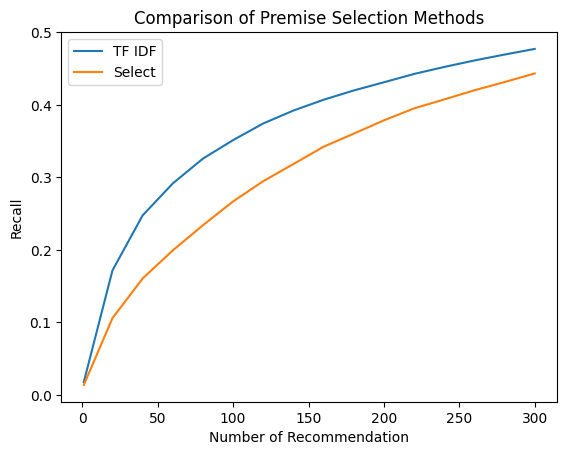

In [ ]:
fig, ax = plt.subplots()
for name, recalls in zip(names, recalls_list):
    ax.plot(ATS, recalls, label=name)
ax.set_xlabel("Number of Recommendation")
ax.set_ylabel("Recall")
ax.legend()
ax.set_title("Comparison of Premise Selection Methods")



In [ ]:
for name, recall_list in zip(names, recalls_list):
    for at, recall in zip(ATS, recall_list):
        print(f"{name} top {at}: {recall}")
    print()

TF IDF top 1: 0.017999293036408626
TF IDF top 20: 0.17177801343230822
TF IDF top 40: 0.24762106751502297
TF IDF top 60: 0.2917073170731707
TF IDF top 80: 0.3259384941675504
TF IDF top 100: 0.3514316012725345
TF IDF top 120: 0.3744220572640509
TF IDF top 140: 0.392180982679392
TF IDF top 160: 0.40706963591375045
TF IDF top 180: 0.41986567691763876
TF IDF top 200: 0.43116295510781194
TF IDF top 220: 0.44264404383174266
TF IDF top 240: 0.45227288794627074
TF IDF top 260: 0.4612230470130788
TF IDF top 280: 0.46936726758571934
TF IDF top 300: 0.47714386709084483

Select top 1: 0.013891333316571544
Select top 20: 0.10598898750408568
Select top 40: 0.16062404143514444
Select top 60: 0.19938148995549745
Select top 80: 0.23406582354863853
Select top 100: 0.2669021698136927
Select top 120: 0.294848263897619
Select top 140: 0.31840695949513487
Select top 160: 0.34231765267895303
Select top 180: 0.36034495763457625
Select top 200: 0.3786739748070299
Select top 220: 0.3951675759937646
Select top 24

In [ ]:
precisions: list[float] = []
recalls: list[float] = []
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

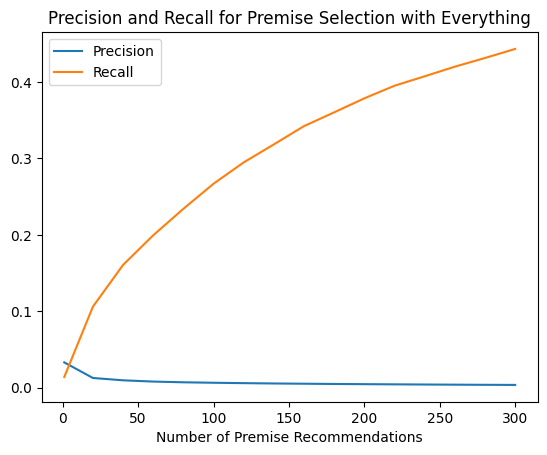

In [ ]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()